In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ignoring some default warnings about slicing re: dataframe manipulations.
pd.options.mode.chained_assignment = None  # default='warn'


We pulled this dataset of Michelin Starred Resturants from Kaggle, to explore and do some exploratory data analytics on questions that we'd want to learn from this dataset.

In [69]:
df = pd.read_csv('./michelin_my_maps.csv')

#let's drop some columns we don't care about; lattitude, longitude, phone number, url.
df = df.drop(columns=['Longitude','Latitude','PhoneNumber','WebsiteUrl','Url'])

#new dataframe without Bib Gourmand Restaurants, as they're not correlated with Michelin stars.
michelin_df = df[df.Award != 'Bib Gourmand']

In [70]:
michelin_df.head()

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225.0,225.0,EUR,"Creative, Modern Cuisine",3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230.0,230.0,EUR,Creative,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259.0,319.0,EUR,Creative,3 MICHELIN Stars
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205.0,295.0,EUR,Creative,3 MICHELIN Stars
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198.0,245.0,EUR,"Modern Cuisine, Creative",3 MICHELIN Stars


Overall Michelin Starred Restaurant Counts in this dataset

[Text(0.5, 1.0, 'Number of Michelin Starred Restaurants across world')]

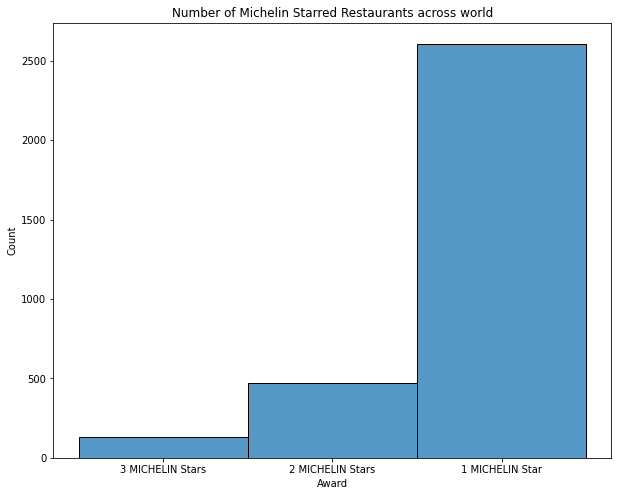

In [71]:
#michelin star counts
figsize = (10,8)

fig = plt.subplots(figsize=figsize)
sns.histplot(michelin_df, x='Award').set(title='Number of Michelin Starred Restaurants across world')

Top 10 Overall Locations with the most Michelin Starred Restaurants


In [72]:
#counts with stars
michelin_counts = michelin_df['Location'].value_counts().to_frame()

#top 10 locations with highest stars
top10_michelin_rest = michelin_counts.nlargest(10,'Location')
#resetting index, to be able to plot locations
top10_michelin_rest = top10_michelin_rest.reset_index() 
#renaming columns
top10_michelin_rest = top10_michelin_rest.rename(columns={"Location":"counts","index":"location"})
top10_michelin_rest

,location,counts
0,Tokyo,203
1,Kyoto,108
2,Paris,108
3,Osaka,95
4,London,71
5,Hong Kong,71
6,New York,65
7,Singapore,49
8,Shanghai,47
9,Beijing,34


[Text(0.5, 1.0, 'Top 10 Locations with Most Michelin Stars')]

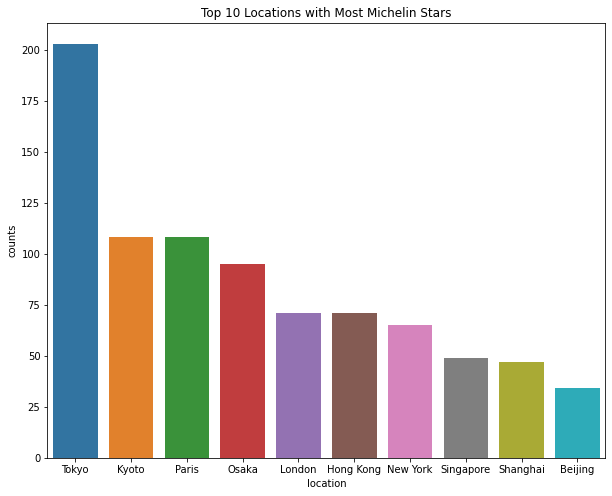

In [73]:
#locations with highest # of michelin starred restaurants
fig = plt.subplots(figsize=figsize)
sns.barplot(x='location', y='counts', data=top10_michelin_rest).set(title='Top 10 Locations with Most Michelin Stars')

Locations with the most 3 michelin starred restaurants?


In [74]:
#Where are the locations with the most 3 michelin starred restaurants?
stars_3 = michelin_df[michelin_df['Award'] == '3 MICHELIN Stars']
stars_3 = stars_3.groupby(['Location'])['Award'].count().sort_values(ascending=False).reset_index()
stars_3_top = stars_3.head(5)
stars_3_top = stars_3_top.rename(columns={"Award":"Count"})

stars_3_top

,Location,Count
0,Tokyo,12
1,Paris,9
2,Hong Kong,7
3,Kyoto,6
4,London,5


Locations with Most 2 Starred?

In [75]:
#2 starred
stars_2 = michelin_df[michelin_df['Award'] == '2 MICHELIN Stars']
stars_2 = stars_2.groupby(['Location'])['Award'].count().sort_values(ascending=False).reset_index()
stars_2_top = stars_2.head(5)
stars_2_top = stars_2_top.rename(columns={"Award":"Count"})

stars_2_top

,Location,Count
0,Tokyo,41
1,Kyoto,19
2,New York,12
3,Hong Kong,12
4,Paris,11


Locations with Most 1 Starred?

In [76]:
stars_1 = michelin_df[michelin_df['Award'] == '1 MICHELIN Star']
stars_1 = stars_1.groupby(['Location'])['Award'].count().sort_values(ascending=False).reset_index()
stars_1_top = stars_1.head(5)
stars_1_top = stars_1_top.rename(columns={"Award":"Count"})

stars_1_top

,Location,Count
0,Tokyo,150
1,Paris,88
2,Kyoto,83
3,Osaka,81
4,London,56


Text(0.5, 1.0, 'One Michelin Stars')

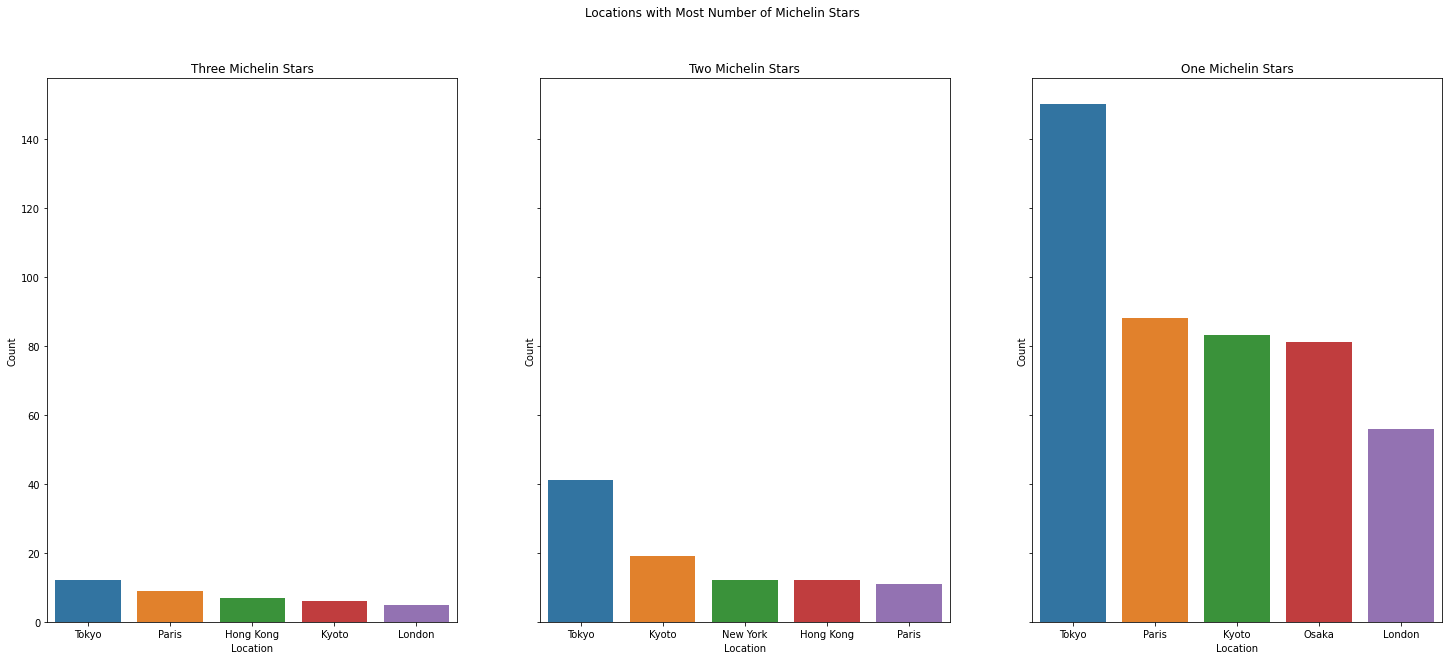

In [77]:
#converted to three chart subplot for easier comparison and viewing across stars.
fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharey=True)
fig.suptitle('Locations with Most Number of Michelin Stars')

#first chart
sns.barplot(ax=axes[0], data=stars_3_top, x=stars_3_top.Location, y=stars_3_top.Count)
axes[0].set_title('Three Michelin Stars')

#second chart
sns.barplot(ax=axes[1], data=stars_2_top, x=stars_2_top.Location, y=stars_2_top.Count)
axes[1].set_title('Two Michelin Stars')

#third chart
sns.barplot(ax=axes[2], data=stars_1_top, x=stars_1_top.Location, y=stars_1_top.Count)
axes[2].set_title('One Michelin Stars')


Let's Compare Price Ranges in Tokyo Restaurants to New York Restaurants
(normally we'd go by range, max-min, but a lot of restaurants have pre-fixe menu's which are set price options so removing them would be incorrect)

In [78]:
#let's compare tokyo to new york!
tokyo_michelin = michelin_df[michelin_df['Location']=='Tokyo']

#prices in yen to usd
#conversion rate is currently 1 JPY to .0077 USD.
#we're going by Max Price, because of pre-fixe and also because it's usually budgeted towards app, entree, dessert.

tokyo_michelin['MaxPrice'] *= float(.0077)
tokyo_michelin['MinPrice'] *= float(.0077)

tokyo_michelin

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Award
41,L'OSIER,"7-5-5 Ginza, Chuo-ku, Tokyo, 104-0061, Japan",Tokyo,100.10,338.8,JPY,French,3 MICHELIN Stars
42,Sazenka,"4-7-5 Minamiazabu, Minato-ku, Tokyo, 106-0047,...",Tokyo,261.80,562.1,JPY,Chinese,3 MICHELIN Stars
43,Kagurazaka Ishikawa,"5-37 Kagurazaka, Shinjuku-ku, Tokyo, 162-0825,...",Tokyo,331.10,331.1,JPY,Japanese,3 MICHELIN Stars
44,Kanda,"1-1-1 Atago, Minato-ku, Tokyo, 105-0002, Japan",Tokyo,284.90,331.1,JPY,Japanese,3 MICHELIN Stars
45,L'Effervescence,"2-26-4 Nishiazabu, Minato-ku, Tokyo, 106-0031,...",Tokyo,261.80,261.8,JPY,French,3 MICHELIN Stars
...,...,...,...,...,...,...,...,...
1535,Ginza Yamanobe Edo Chuka,"6-7-6 Ginza, Chuo-ku, Tokyo, 104-0061, Japan",Tokyo,261.80,308.0,JPY,Chinese,1 MICHELIN Star
1536,Akiyama,"6-5-3 Shirokane, Minato-ku, Tokyo, 108-0072, J...",Tokyo,23.10,161.7,JPY,Japanese,1 MICHELIN Star
1537,Oryori Tsuji,"3-3-9 Higashiazabu, Minato-ku, Tokyo, 106-0044...",Tokyo,77.00,284.9,JPY,Japanese,1 MICHELIN Star
1538,WASA,"3-16-1 Higashi, Shibuya-ku, Tokyo, 150-0011, J...",Tokyo,238.70,238.7,JPY,Chinese,1 MICHELIN Star


In [91]:
tokyo_michelin['Bins'] = pd.cut(tokyo_michelin['MaxPrice'],5)
tokyo_michelin['Bins']

41      (231.77, 341.88]
42       (451.99, 562.1]
43      (231.77, 341.88]
44      (231.77, 341.88]
45      (231.77, 341.88]
              ...       
1535    (231.77, 341.88]
1536    (121.66, 231.77]
1537    (231.77, 341.88]
1538    (231.77, 341.88]
1539    (121.66, 231.77]
Name: Bins, Length: 203, dtype: category
Categories (5, interval[float64, right]): [(10.999, 121.66] < (121.66, 231.77] < (231.77, 341.88] < (341.88, 451.99] < (451.99, 562.1]]

Text(0.5, 1.0, 'Max Price of Restaurants in Tokyo Across Bins ($11 - 122), (122-232), (232 - 342), (342 -452), (452 - 562.)')

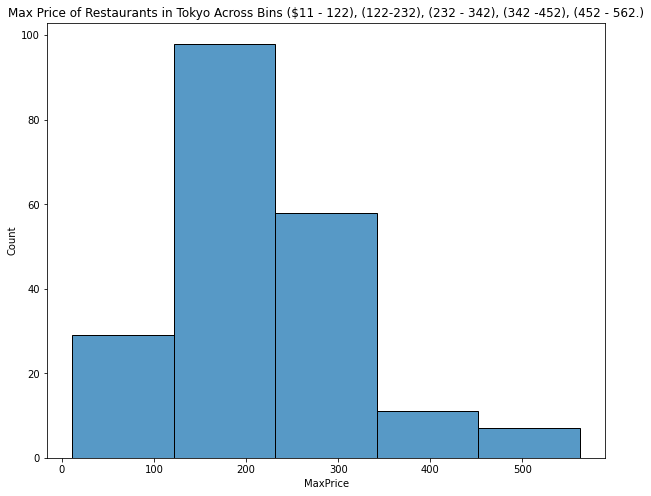

In [98]:
fig = plt.subplots(figsize=figsize)

sns.histplot(tokyo_michelin['MaxPrice'], bins=5).set_title('Max Price of Restaurants in Tokyo Across Bins ($11 - 122), (122-232), (232 - 342), (342 -452), (452 - 562.)')

In [80]:
ny_michelin = michelin_df[michelin_df['Location']=='New York']
ny_michelin

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Award
91,Eleven Madison Park,"11 Madison Ave., New York, 10010, United States",New York,125.0,285.0,USD,"Contemporary, Innovative",3 MICHELIN Stars
92,Per Se,"10 Columbus Circle, New York, 10019, United St...",New York,355.0,355.0,USD,"Contemporary, French",3 MICHELIN Stars
93,Masa,"10 Columbus Circle, New York, 10019, United St...",New York,595.0,595.0,USD,"Japanese, Sushi",3 MICHELIN Stars
94,Le Bernardin,"155 W. 51st St., New York, 10019, United States",New York,93.0,228.0,USD,Seafood,3 MICHELIN Stars
95,Chef's Table at Brooklyn Fare,"431 W. 37th St., New York, 10018, United States",New York,395.0,395.0,USD,Contemporary,3 MICHELIN Stars
...,...,...,...,...,...,...,...,...
2359,Jeju Noodle Bar,"679 Greenwich St., New York, 10014, United States",New York,50.0,50.0,USD,Korean,1 MICHELIN Star
2360,Don Angie,"103 Greenwich Ave., New York, 10014, United St...",New York,75.0,75.0,USD,"Italian, American",1 MICHELIN Star
2361,The Clocktower,"5 Madison Ave., New York, 10010, United States",New York,65.0,100.0,USD,"Contemporary, English",1 MICHELIN Star
2362,Kosaka,"220 W. 13th St., New York, 10011, United States",New York,145.0,155.0,USD,"Japanese, Sushi",1 MICHELIN Star


Text(0.5, 1.0, 'Max Price of Restaurant in NY Across Bins ($50 - $159), ($159-$268), ($268 - $377), ($377 -$486), ($486 - $595)')

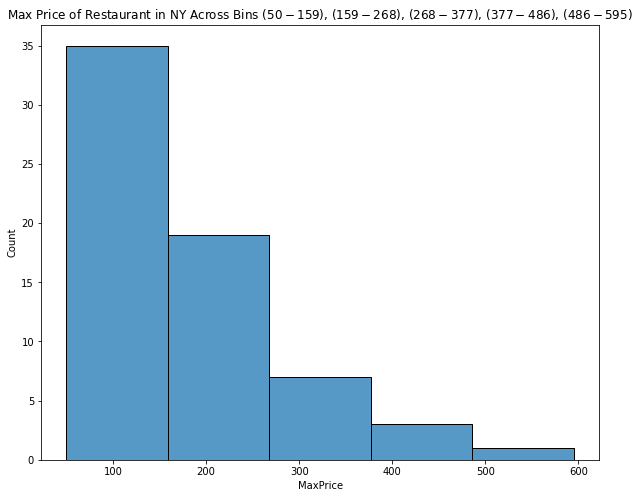

In [99]:
fig = plt.subplots(figsize=figsize)

sns.histplot(ny_michelin['MaxPrice'], bins=5).set_title('Max Price of Restaurant in NY Across Bins ($50 - $159), ($159-$268), ($268 - $377), ($377 -$486), ($486 - $595)')

In [94]:
ny_michelin['Bins'] = pd.cut(ny_michelin['MaxPrice'],5)
ny_michelin['Bins']

91       (268.0, 377.0]
92       (268.0, 377.0]
93       (486.0, 595.0]
94       (159.0, 268.0]
95       (377.0, 486.0]
             ...       
2359    (49.455, 159.0]
2360    (49.455, 159.0]
2361    (49.455, 159.0]
2362    (49.455, 159.0]
2363    (49.455, 159.0]
Name: Bins, Length: 65, dtype: category
Categories (5, interval[float64, right]): [(49.455, 159.0] < (159.0, 268.0] < (268.0, 377.0] < (377.0, 486.0] < (486.0, 595.0]]

Let's observe some restaurants within the first New York bin, the only one we can afford as a college student!

In [82]:
ny_michelin['Bins'] = pd.cut(ny_michelin['MaxPrice'],5)
#ny_michelin['Bins']
#49.455, 159.0
kevin_budget = ny_michelin[ny_michelin['Bins'].astype(str)=='(49.455, 159.0]']
#looking at the cheapest 5 to fall into the budget! looks like we're getting noodles.
kevin_budget.tail(5)


,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Award,Bins
2359,Jeju Noodle Bar,"679 Greenwich St., New York, 10014, United States",New York,50.0,50.0,USD,Korean,1 MICHELIN Star,"(49.455, 159.0]"
2360,Don Angie,"103 Greenwich Ave., New York, 10014, United St...",New York,75.0,75.0,USD,"Italian, American",1 MICHELIN Star,"(49.455, 159.0]"
2361,The Clocktower,"5 Madison Ave., New York, 10010, United States",New York,65.0,100.0,USD,"Contemporary, English",1 MICHELIN Star,"(49.455, 159.0]"
2362,Kosaka,"220 W. 13th St., New York, 10011, United States",New York,145.0,155.0,USD,"Japanese, Sushi",1 MICHELIN Star,"(49.455, 159.0]"
2363,Carbone,"181 Thompson St., New York, 10003, United States",New York,150.0,150.0,USD,"Italian, Italian-American",1 MICHELIN Star,"(49.455, 159.0]"


Let's look further into New York restaurants! Let's look at the Max Price ranges across the board

Text(0.5, 1.0, 'Tokyo Max Price Chart')

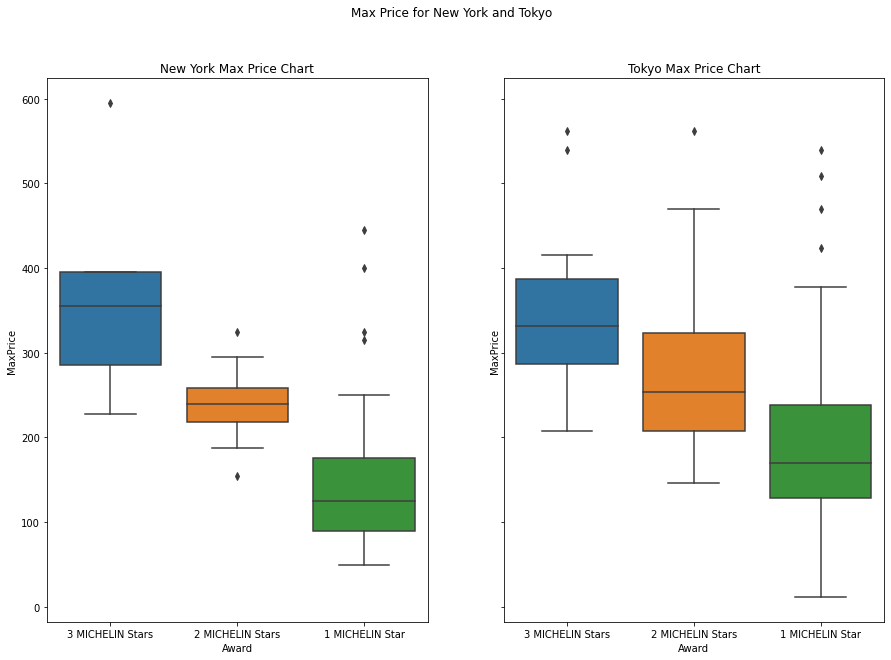

In [84]:
#converted to two chart subplot for easier comparison and viewing across stars.
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Max Price for New York and Tokyo')

#first chart; new york min price
sns.boxplot(ax= axes[0], data=ny_michelin,x=ny_michelin['Award'], y=ny_michelin['MaxPrice'])
axes[0].set_title('New York Max Price Chart')
#second chart; tokyo max price
sns.boxplot(ax = axes[1], data=tokyo_michelin,x=tokyo_michelin['Award'], y=tokyo_michelin['MaxPrice'])
axes[1].set_title('Tokyo Max Price Chart')



How about Minimum Prices (Let's pretend apps and a drink counts for a meal!)

Text(0.5, 1.0, 'Tokyo Min Price Chart')

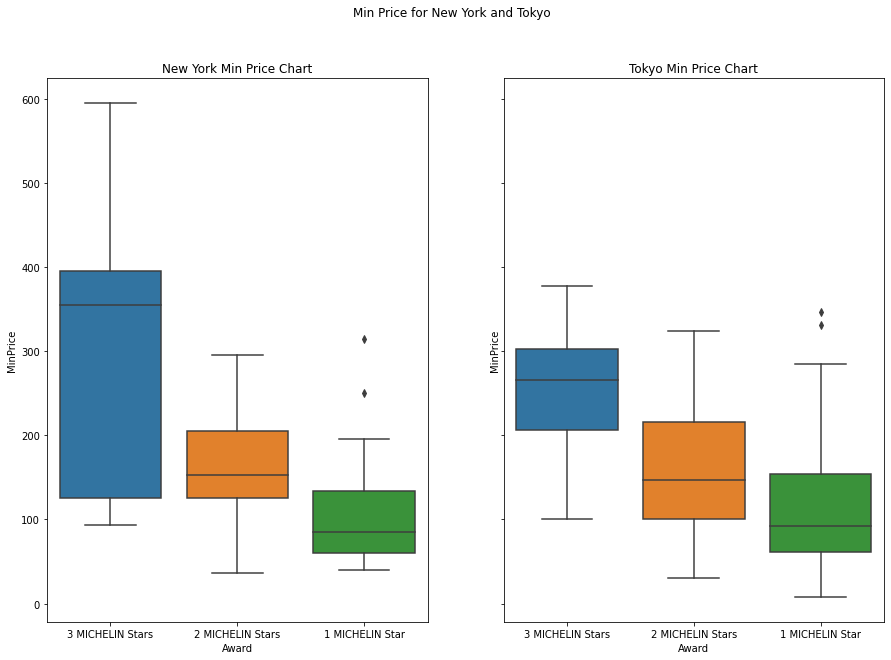

In [85]:
#converted to two chart subplot for easier viewing
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Min Price for New York and Tokyo')

#first chart; new york min price
sns.boxplot(ax= axes[0], data=ny_michelin,x=ny_michelin['Award'], y=ny_michelin['MinPrice'])
axes[0].set_title('New York Min Price Chart')
#second chart; tokyo min price
sns.boxplot(ax = axes[1], data=tokyo_michelin,x=tokyo_michelin['Award'], y=tokyo_michelin['MinPrice'])
axes[1].set_title('Tokyo Min Price Chart')

What's the spread for cuisines in Michelin Starred Restaurants in New York?

In [100]:
# cuisines = ny_michelin.groupby('Cuisine')
ny_cuisines = ny_michelin['Cuisine'].value_counts().reset_index()
ny_cuisines = ny_cuisines.rename(columns={"Cuisine":"Count","index":"Cuisine"})

ny_cuisines

,Cuisine,Count
0,"Japanese, Sushi",10
1,Contemporary,8
2,"Contemporary, American",3
3,"Korean, Contemporary",3
4,Seafood,2
5,"French, Contemporary",2
6,"Scandinavian, Contemporary",2
7,French,2
8,"Contemporary, American Contemporary",2
9,Italian,1


<AxesSubplot:xlabel='Count', ylabel='Cuisine'>

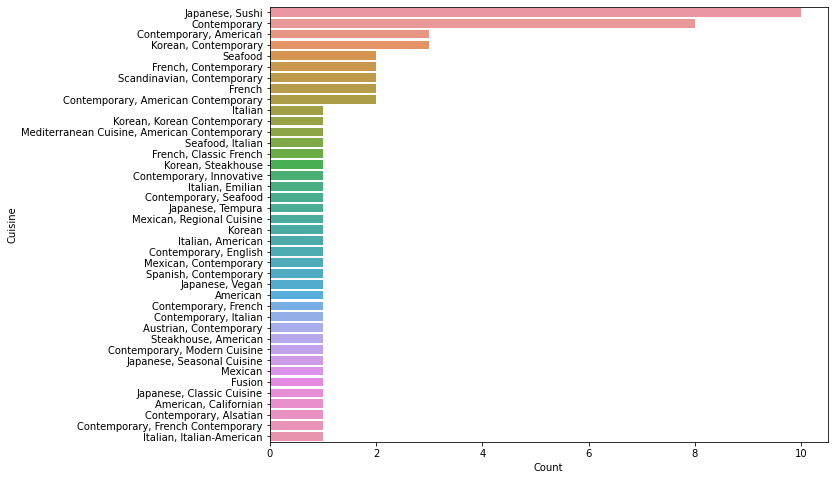

In [87]:
fig = plt.subplots(figsize=figsize)
sns.barplot(y='Cuisine', x='Count', data=ny_cuisines)
#wonder why Michelin loves Japanese food!

How about in the world? (reduced to 30 for visibility)

In [88]:
cuisines = michelin_df['Cuisine'].value_counts().reset_index()
cuisines = cuisines.rename(columns={"Cuisine":"Count","index":"Cuisine"})

top_30_cuisines = cuisines.head(30)
top_30_cuisines

,Cuisine,Count
0,Modern Cuisine,680
1,Creative,422
2,Japanese,218
3,French,95
4,"Creative, Modern Cuisine",75
5,Classic Cuisine,68
6,Cantonese,67
7,Sushi,65
8,Modern French,60
9,"Modern Cuisine, Creative",57


<AxesSubplot:xlabel='Count', ylabel='Cuisine'>

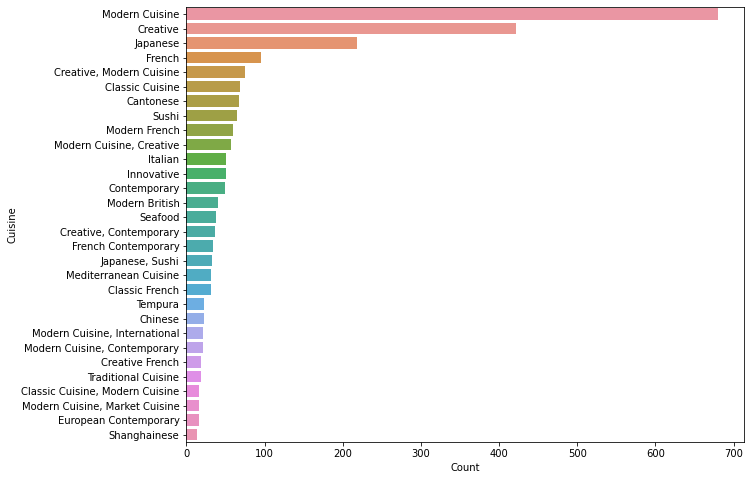

In [89]:
fig = plt.subplots(figsize=figsize)
sns.barplot(y='Cuisine', x='Count', data=top_30_cuisines)